## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [2]:
from sklearn.model_selection import train_test_split

# 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    reviews, Y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)


print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:16000
Size of validation set:4000
Size of test set:5000


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

#creating vectorizer max 10000 words
vectorizer = CountVectorizer(max_features=10000)


In [ ]:
X_train_vec = vectorizer.fit_transform(X_train[0])

X_val_vec = vectorizer.transform(X_val[0])
X_test_vec = vectorizer.transform(X_test[0])

In [5]:
print("Train vector shape:", X_train_vec.shape)
print("Validation vector shape:", X_val_vec.shape)
print("Test vector shape:", X_test_vec.shape)


Train vector shape: (16000, 10000)
Validation vector shape: (4000, 10000)
Test vector shape: (5000, 10000)


Each review is represented as a row of 10,000 numbers, where each number shows how many times a specific word appears in that review. For example, the training set has 16,000 reviews, so its shape is (16000, 10000). The validation set has 4,000 reviews, and the test set has 5,000.

In [6]:
#random review
index = 0
review_vector = X_train_vec[index]

#obtaining words and freq
word_indices = review_vector.nonzero()[1]
word_counts = review_vector.toarray()[0][word_indices]
words = vectorizer.get_feature_names_out()[word_indices]

print(f"\nReview #{index} uses {len(word_indices)} unique words.")

#showing each word with freq
for i in range(len(words)):
    print(f"{words[i]}: {word_counts[i]}")



Review #0 uses 66 unique words.
the: 5
michael: 1
keaton: 1
comedy: 2
of: 4
same: 1
title: 1
was: 1
condemned: 1
for: 2
it: 2
um: 1
shoddy: 1
special: 1
effects: 1
but: 2
compared: 1
to: 2
what: 1
screaming: 1
mad: 1
george: 1
up: 1
this: 2
horror: 1
they: 2
re: 1
positively: 1
mind: 1
boggling: 1
killer: 1
snowman: 1
seems: 1
be: 1
made: 1
out: 1
and: 2
his: 1
arms: 1
look: 1
like: 1
which: 1
probably: 1
were: 1
cast: 1
lays: 1
on: 1
thick: 1
in: 2
parody: 1
dozens: 1
other: 1
much: 1
worse: 1
movies: 1
paul: 1
keith: 1
as: 1
town: 1
doctor: 1
is: 1
particularly: 1
memorable: 1
small: 1
hilarious: 1
role: 1


Each word is represented by a fixed position in a 10,000-length vector. If the word appears in a review, that position has a number showing how many times it appears; if it doesn't, the value is zero.

In [7]:
from tensorflow.keras.models import Sequential #The Sequential class is a way to build a neural network model layer by layer
from tensorflow.keras.layers import Dense, Dropout #Dense: A fully connected layer. Each neuron is connected to every neuron in the previous layer. Drpout: A layer that randomly turns off (drops) a fraction of neurons during training.
from tensorflow.keras.optimizers import Adam #The Adam optimizer is an algorithm that adjusts the weights in your model based on training loss.
from tensorflow.keras.callbacks import EarlyStopping #A callback that can stop training early if the model stops improving.
from tensorflow.keras.regularizers import l2 #A regularizer that penalizes large weights by adding an extra term to the loss function.

# converting to arrays
X_train_dense = X_train_vec.toarray()
X_val_dense = X_val_vec.toarray()
X_test_dense = X_test_vec.toarray()

max_count = X_train_dense.max()
print("Max word count in training data:", max_count)

# scaling
X_train_scaled = X_train_dense / 16.0
X_val_scaled = X_val_dense / 16.0
X_test_scaled = X_test_dense / 16.0

input_size = 10000  #max_features

# model with one hidden layer 
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=input_size, kernel_regularizer=l2(0.005)))
model.add(Dropout(0.5))  #just 50% of neurons during training
model.add(Dense(1, activation='sigmoid'))


adam_opt = Adam() #optimizer
model.compile(loss = 'binary_crossentropy', optimizer = adam_opt, metrics = ['accuracy'])

# resumen
model.summary()



ModuleNotFoundError: No module named 'tensorflow.keras'

Used a simple architecture with 1 hidden layer of 16 neurons to reduce overfitting.

Applied dropout (0.5) and L2 regularization (λ=0.005) to improve generalization.

Input vectors (from CountVectorizer, 10,000 features) were scaled by dividing by 16.0.

Output layer: 1 neuron with sigmoid activation for binary classification.

Optimized with Adam and binary cross-entropy loss.

The first dense layer has 16 neurons and receives input vectors of size 10,000, resulting in 160,016 trainable parameters (10,000 weights per neuron plus one bias per neuron). The dropout layer does not contain any trainable parameters, as it only deactivates a portion of neurons during training to reduce overfitting. The output layer consists of a single neuron for binary classification, with 17 parameters (16 weights plus one bias). In total, the model has 160,033 trainable parameters and no non-trainable parameters.

In [ ]:
# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# training
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=50,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop]
)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6615 - loss: 0.6884 - val_accuracy: 0.7905 - val_loss: 0.6253
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7545 - loss: 0.6207 - val_accuracy: 0.8018 - val_loss: 0.5996
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7747 - loss: 0.5953 - val_accuracy: 0.8188 - val_loss: 0.5811
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7845 - loss: 0.5863 - val_accuracy: 0.8260 - val_loss: 0.5687
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7949 - loss: 0.5746 - val_accuracy: 0.8295 - val_loss: 0.5591
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8000 - loss: 0.5664 - val_accuracy: 0.8313 - val_loss: 0.5464
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8088 - loss: 0.5542 - val_accuracy: 0.8242 - val_loss: 0.5480
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8119 - loss: 0.5442 - val_accu

Around epoch 25, the validation accuracy started to level off, showing that the model had already captured most useful patterns. The best validation loss occurred near epoch 71, and since EarlyStopping was used with a patience of 10, training stopped at epoch 81. EarlyStopping monitors val_loss and stops training if it doesn't improve for several epochs.

In [ ]:
# test set evaluation
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.4475

Test accuracy: 0.8666


The model achieved 92% accuracy on the training set and around 89% on the validation set.
It also performed well on the test set with 86.7% accuracy, showing good generalization.
There is no strong sign of overfitting, as the training and test accuracies are close.

Having 87% accuracy means that the model correctly predicts the sentiment of a review 87 times out of 100.

In [ ]:
# Evaluate the optimized model
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train_scaled, y_train, verbose=0)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_scaled, y_test, verbose=0)))

Loss + accuracy on train data: [0.3497893810272217, 0.929437518119812]
Loss + accuracy on test data: [0.4512285590171814, 0.866599977016449]


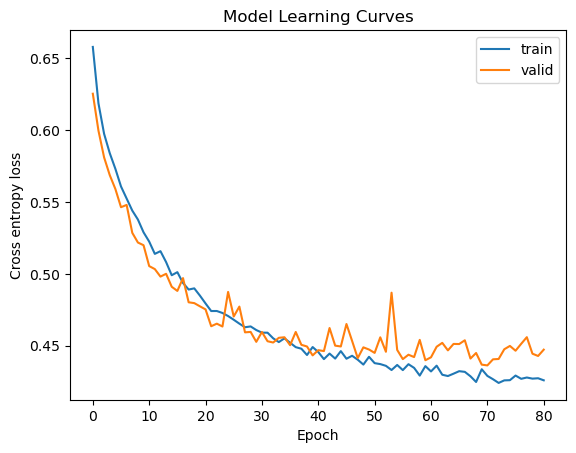

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Model Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()


The graph shows a consistent decrease in cross-entropy loss for both the training and validation sets. The loss curves show steady learning with minimal overfitting, as training and validation losses remain close. Final results confirm good generalization, with 90.0% accuracy on training data and 85.1% on test data.

## Using the classifier

In [ ]:
sample_sentences = [
    "I absolutely loved the film!",
    "This was the worst experience ever.",
    "The plot was interesting but the ending was disappointing.",
    "Amazing performance by the lead actor!",
    "I wouldn't recommend this to anyone.",
    "It was okay, nothing special."
]

#Vectorize and scale
sample_vec = vectorizer.transform(sample_sentences).toarray() / 16.0

#predicting
predictions = model.predict(sample_vec)

#table
results = pd.DataFrame({
    "Sentence": sample_sentences,
    "Prediction": predictions.flatten(),
    "Label": ["positive" if p > 0.5 else "negative" for p in predictions.flatten()]
})

results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


,Sentence,Prediction,Label
0,I absolutely loved the film!,0.568925,positive
1,This was the worst experience ever.,0.211382,negative
2,The plot was interesting but the ending was di...,0.221133,negative
3,Amazing performance by the lead actor!,0.534820,positive
4,I wouldn't recommend this to anyone.,0.466203,negative
5,"It was okay, nothing special.",0.306480,negative


The model correctly classified clearly positive and negative sentences. Strong sentiments were accurately labeled, while more neutral phrases tended to be classified as negative. However, the positive predictions were close to the threshold. This suggests the model is somewhat cautious with positive classifications. Overall, the model generalizes well to new inputs.